# Полный факторный эксперимент. Дробный факторный эксперимент

## Введение
___

**Планирование эксперимента** – это процедура выбора числа и условий
проведения опытов, необходимых и достаточных для получения
математической модели процесса. 

При этом важно учитывать следующее: стремление к минимизации числа опытов; одновременное
варьирование всех переменных, определяющих процесс; выбор четкой
стратегии, позволяющей принимать обоснованные решения после каждой
серии экспериментов. Перед проведением планирования активного
эксперимента необходимо собрать дополнительную информацию об
исследуемом объекте, для получения которой используются навыки и
знания, которые получены ранее в предыдущих исследованиях или
описаны в литературе.

При использовании метода активного планирования весь эксперимент обычно 
разбивается на несколько этапов. Информация, полученная
после каждого этапа, используется для планирования исследований на 
следующем этапе. Планирование эксперимента позволяет варьировать ряд
факторов и получать одновременно количественные оценки всех 
проявляющихся эффектов. При этом, в отличие от классического регрессионного анализа, 
избежать корреляции между коэффициентами уравнения регрессии. 

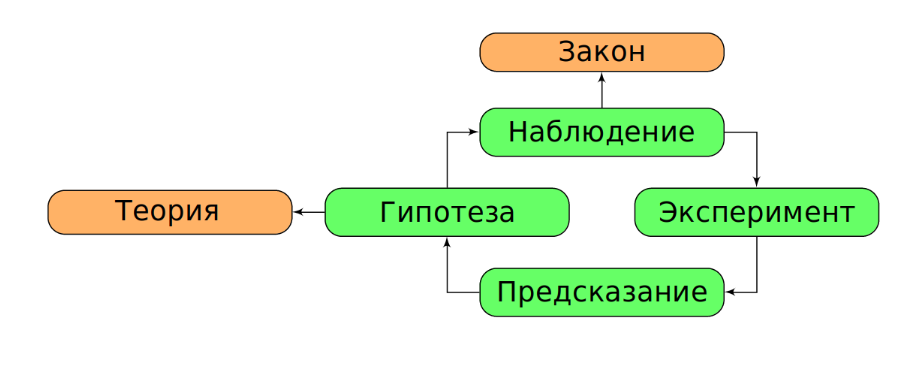

**Метод полного факторного эксперимента включает в себя последовательные этапы математического моделирования:**

1. Выбор параметра (или параметров) оптимизации и влияющих факторов.


2. Выбор основного уровня и интервала варьирования по каждому фактору.


3. Проверка воспроизводимости результатов эксперимента.


4. Собственно построение математической модели с вычислением коэффициентов уравнения регрессии.


5. Проверка адекватности уравнения регрессии.


6. Инженерная интерпретация уравнения регрессии.

### Определения
___

**Математическое моделирование** – изучение свойств объекта на математической модели.


**Цель** – определение различных условий (оптимальных, экстремальных) протекания процесса, управление им на основе математической модели и перенос результатов на объект.


**Математической моделью** называют приближенное описание какого либо явления или процесса внешнего мира, выраженное с помощью математической символики.

**Параметр оптимизации (ПО)** - зависимая переменная.


**Основной уровень** можно рассматривать как исходную точку для построения плана эксперимента (нулевой уровень). Построение плана эксперимента сводится к выбору экспериментальных точек, симметричных относительно основного уровня.


**Интервалом варьирования** факторов называется некоторое число (свое для каждого фактора), прибавление которого к основному уровню дает верхний, а вычитание — нижний уровни фактора. Другими словами, интервал варьирования — это расстояние на координатной оси между основным и верхним или нижним уровнем. Таким образом, задача выбора уровней сводится к более простой задаче выбора интервала варьирования.

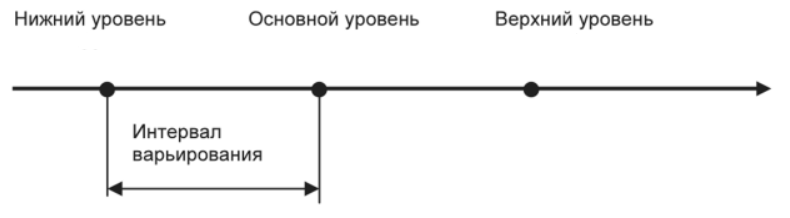

**Выбор интервала варьирования**

Обычно различные количественные факторы воздействуют на параметр оптимизации аналогичным образом: при низких значениях уровня фактора, увеличение значений фактора приводит к росту ПО (положительное влияние фактора). 


Затем наступает  **зона насыщения** (зона оптимума), в пределах которой изменения значений уровней фактора
не влекут за собой изменений значений ПО (фактор не оказывает влияния). 


За верхним пределом зоны насыщения наступает **зона угнетения**, в пределах которой увеличение уровней фактора 
приводит к падению значений ПО – отрицательное влияние фактора .

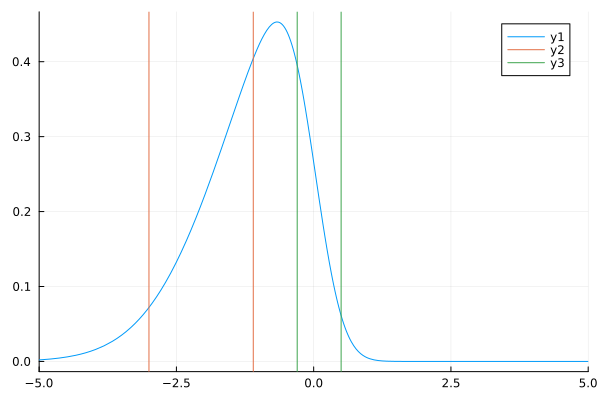

In [1]:
using Distributions, Plots
f2(x) = pdf(SkewNormal(0, 1.5, -3.5), x)
plot(f2, xlims = (-5,5))
vline!([-3, -1.1])
vline!([-0.3, 0.5])

**Сигмоидная зависимость**

Кроме этого, для некоторых процессов возможна и сигмоидная зависимость.

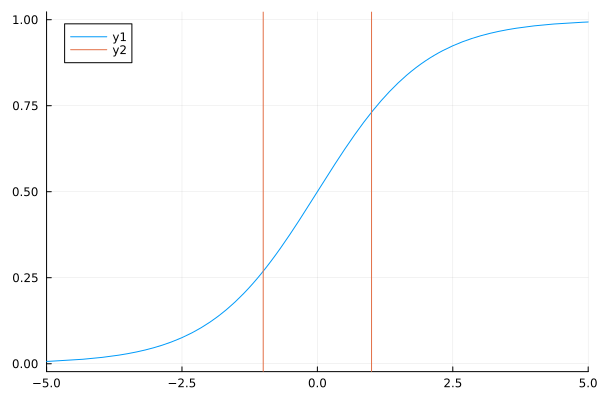

In [2]:
using Plots, Distributions
f(x) = 1/(1+exp(-x))
plot(f, xlims = (-5,5))
vline!([-1,1.0])

**В целом возможны разные зависимости изменения параметра отклика от изменения значения фактора**

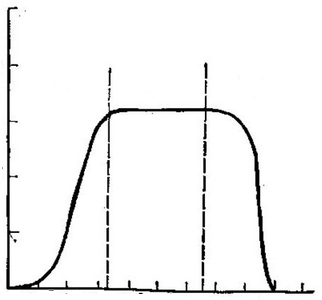

Один и тот же фактор может влиять положительно, отрицательно, либо не влиять вообще – характер влияния зависит
от выбора уровней фактора. При планировании эксперимента необходимо выбрать интервал, в рамках которого будет варьироваться фактор. 

Обычно (по экономическим, техническим и другим причинам), экспериментатора интересует зона лимитирования, ширину интервала которой он планирует установить, а также получить количественную зависимость ПО от данного фактора внутри исследуемой зоны.

Если фактор будет варьироваться в пределах одной из перечисленных зон – в этом случае данный фактор достаточно варьировать на двух уровнях, что подтверждается мировым опытом применения методов
планирования многофакторных экспериментов. При варьировании фактора в пределах двух или трёх зон, фактор придётся варьировать на большем количестве уровней или проводить несколько серий экспериментов.

**Математическая модель, функциональная зависимость**

Формально в качестве экспериментального результата получают зависимость $Y=f(x_1
,...,x_n)$. Функциональная зависимость должна быть простой и информативной. Обычно лучше всего подходит полиномиальная модель в виде уравнения регрессии: 


$$y= b_0 + b_1x_1 + b_2x_2 + b_{12}x_1x_2 + ... + b_{11}x_1^2 + ... $$


Коэффициенты уравнения регрессии количественно характеризуют влияние каждого фактора на **объект исследования**, а также
влияния эффектов взаимодействия факторов. В простейшем случае при изучении влияния одного фактора получаем: $y= b_0 + b_1 x_1$.

Очевидно, что данная модель схожа с моделью однофакторного дисперсионного анализа. В простейшем случае существует как минимум 2 уровня одного фактора и соответственно общее количесво экспериментов (групп) равно 2м.

### Полный факторный эксперимент
___

При планировании по схеме полного факторного эксперимента (ПФЭ) реализуются все возможные комбинации факторов на всех выбранных для исследования уровнях. Количество опытов N при ПФЭ определяется по формуле:

$$N = n^k$$

где $n$ - количество уровней; $k$ - число факторов.

### План полного факторного эксперимента ПФЭ $2^2$

План полного факторного эксперимента $2^2$ состоит из двух уровней фактора, каждый из которых варьируется на двух уровнях.

Тогда факторное пространство двух факторов, варьируемых на двух уровнях выглядит следующим образом:

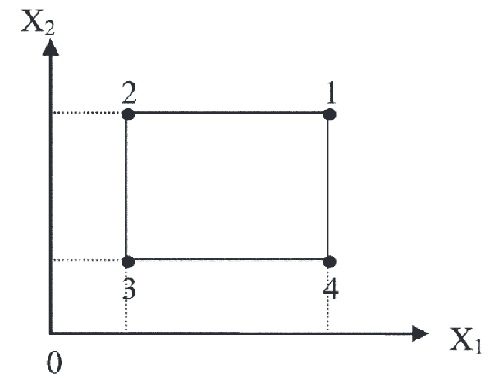

Величины коэффициентов уравнения зависят от размерности и от силы влияния факторов. Но для выделения "чистого" влияния фактора  необходимо освободиться от размерностей факторов. Эта операция
называется **кодированием факторов**. 


Заключается она в следующем: нижний уровень фактора принимается за -1; верхний уровень за +1.
Середина между крайними значениями уровней называется базовым (или основным) уровнем и обозначается 0.

**Необходимо понимать, что изменение функции отклика (параметра оптимизации, поверхности отклика, зависимой переменной) должно быть линейным в интервале варьирования или хотя бы квази-линейным. В случае, если отклик имеет нелинейную природу, то одним из инструментов может стать линеаризация функции отклика, т.е. применение к результатам некоторой функции ($f(x) = ln(x)$, $f(x) = e^x$ и т.д.). В результате такого преобразования должна прлучиться линейная взаимосвязь.**

 В результате кодирования факторное пространство преобразовывается, становясь симметричным относительно начала координат:

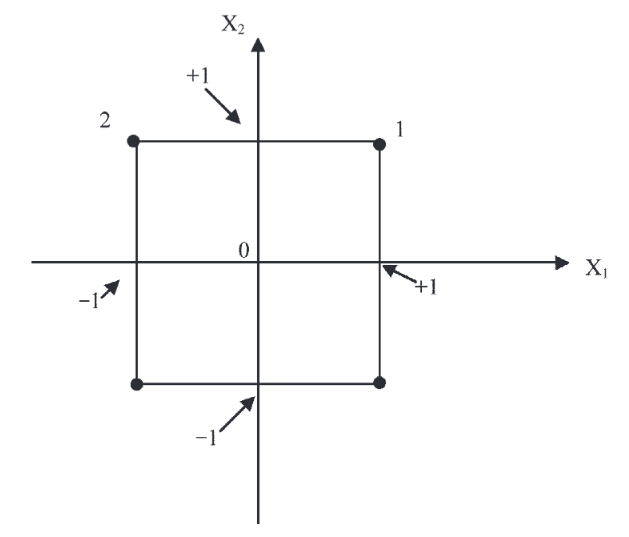

Таким образом, весь эксперимент состоит из четырёх разных опытов. План (матрица) полного факторного эксперимента для двух факторов, каждый из которых варьируется на двух уровнях (ПФЭ $2^2$) выгляит следующим образом:  

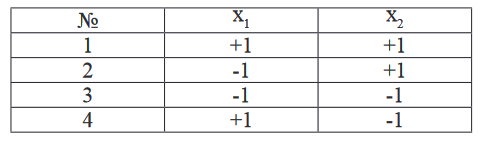

Каждый опыт повторяется 3 или более раз (для некоторых экспериментов сотни раз), что необходимо для выполнения статистической обработки.

Представленный план является симметричным и обладает следующими важными свойствами:

1) **Ортогональность**: скалярные произведения столбцов равны 0. Иными словами, сумма построчных парных произведений чисел первого столбца (для $x_1$) на соответствующие числа второго столбца ($x_2$) равна 0. 
Это говорит об отсутствии взаимодействия между столбцами, поэтому коэффициенты уравнения
регрессии определяются независимо друг от друга, что очень важно для интерпретации коэффициентов уравнения. Такой
план называется D-оптимальным.


2) **Симметричность**: число плюсов равно числу минусов по каждому столбцу. Все коэффициенты уравнения определяются с
минимальными и равными ошибками.


3) **Свойства нормировки**: сумма квадратов элементов столбцов равна числу опытов. Такие планы называются **рототабельными**. Они позволяют рассчитывать ПО с одинаковыми ошибками для всех точек факторного пространства, равноудалённых от центра эксперимента.

Для составления плана полного факторного эксперимента с числом факторов $k$, варьируемых на $n$ уровнях (ПФЭ $n^k$) необходимо перечислить все возможные сочетания $k$ факторов, каждый из которых
принимает $n$ значений (находится на $n$ уровнях).

Матрица планирования ПФЭ $2^3$:

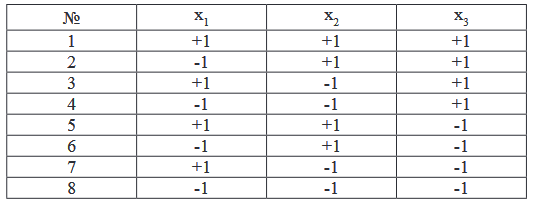

Матрица планирования ПФЭ $3^3$


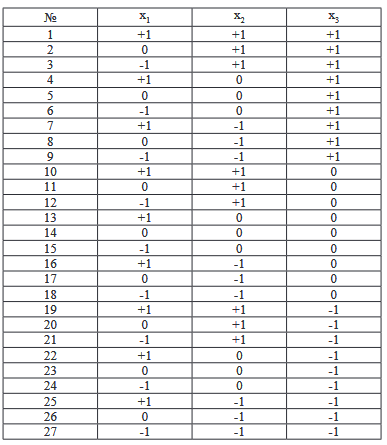

 ПФЭ $2^3$ позволяет получить уравнение, состоящее из 8 членов: 
 
$$y= b_0 + b_1x_1 + b_2x_2 + b_3x_3 +b_{12}x_1x_2 + b_{13}x_1x_3 + b_{23}x_2x_3 + b_{123}x_1x_2x_3$$ 

По результатам постановки ПФЭ $2^4$ получают уравнение регрессии, содержащее уже 16 членов.

Первый член уравнения называется **свободным членом(Intercept)**. Члены, стоящие перед каждым отдельным фактором, называются **главными эффектами**. 

Члены, стоящие перед двойным, тройным и так далее произведениями факторов, называются **эффектами двойных, тройных и
т.д. взаимодействий факторов**. 

Эффекты взаимодействий отражают степень кривизны поверхности отклика: чем больше поверхность отклоняется от плоскости, 
тем выше значения эффектов взаимодействий. 

Это может происходить в случаях, когда экспериментатор выбирает широкие интервалы варьирования факторов, либо когда существует действительная связь факторов (к примеру скорость реакции увеличивается только при увеличении pH и температуры и не увеличивается при изменении отдельных параметров). 

Чем более плоская поверхность отклика, тем меньше наблюдается эффект взаимодействия факторов.

Для расчёта коэффициентов уравнения регрессии, кроме матрицы планирования, необходимы столбцы для расчёта коэффициентов
взаимодействий факторов, а также свободного члена. Последний рассчитывается с помощью столбца, 
так называемой **фиктивной переменной** $х_0$, которая всегда принимает значение +1. 
Столбцы взаимодействий определяются как произведения соответствующих столбцов.

Т.е., для получения значений для ячеек столбца $x_1x_2$ нужно умножить значения столбца $х_1$ на значения столбца $x_2$:

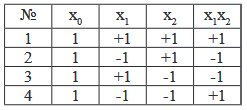

**Проверка и статистическая обработка**

Такоей вид матрицы планирования включает только линейные члены, но может использоваться и полиномиальная модель вида:

$$y= b_0 + b_1x_1 + b_2x_2 + b_{12}x_1x_2 + b_{11}x_1^2 + b_{22}x_2^2 $$

и более высоких порядков. 

Однако при включении в модель факторов более высоких порядков, столбцы в матрице планирования в некоторых случаях начнут повторяться. К примеру если в таблице выше добавить факторы: $b_{11}x_1^2$ и $b_{22}x_2^2$, то они будут состоять из единиц и полностью совпадать с фиктивной переменной. Т.е. будут возникать линейно-зависимые факторы. 

**Линейно зависимые факторы необходимо исключать из модели и оставлять набор только линейно-независимых факторов.**

**Необходимо следить, что бы матрица планированя была полноранговой. Т.е. ранг матрицы был не меньше числа столбцов.**

Далее результаты обрабатываются с помощью общей линейной модели (с помощью метода наименьших квадратов).

In [4]:
using LinearAlgebra
eMat = 
[1 1 1 1;
1 -1 1 -1;
1 1 -1 -1;
1 -1 -1 1]

4×4 Matrix{Int64}:
 1   1   1   1
 1  -1   1  -1
 1   1  -1  -1
 1  -1  -1   1

In [5]:
det(eMat' * eMat)

256.0

In [8]:
rank(eMat)

4

In [7]:
eigvals(eMat' * eMat)

4-element Vector{Float64}:
 4.0
 4.0
 4.0
 4.0

**Пример ПЭФ $2^3$**

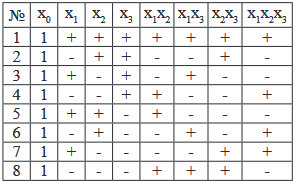

### Дробный факторный эксперимент
___

Количество опытов в полном факторном эксперименте (ПФЭ) быстро растет с увеличением числа факторов и значительно превосходит число определяемых коэффициентов линейной модели, что свидетельствует о большой избыточности опытов ПФЭ.

Для уменьшения числа опытов из множества точек факторного пространства может быть отобрана их некоторая часть, содержащая подходящее число опытов и представляющая собой дробный факторный план.

Эксперимент, число опытов которого меньше числа возможных сочетаний уровней плана, но который сохраняет свойства ПФЭ (симметричность, выполнение условий нормировки, ортогональность), называется дробным факторным экспериментом (ДФЭ). 
Матрица ДФЭ называется дробной репликой. Если дробная реплика составляет половину полной, то она называется полурепликой и обозначается репликой типа $2^{k-1}$, если составляет четверть,  то называется четвертьрепликой (репликой типа $2^{k-2}$) и т.д.

**Рассмотрим правила выбора дробных реплик.**

Необходимо помнить, что число опытов не должно быть меньше числа коэффициентов модели. Вместе с тем, число опытов должно быть таково, чтобы реплика удовлетворяла свойствам ПФЭ. Исходя из этого и выбирают дробность реплики. 

**Для ДФЭ $2^3$**

Если в плане для ПФЭ $2^2$ использовать столбец двойного взаимодействия для введения дополнительного фактора $х_3$, 
($х_3 = х_1х_2$) – получим план, называемой полурепликой от ПФЭ $2^3$, который обозначается как ДФЭ $2^{3-1}$. 

Такой план называется полурепликой потому что в качестве экспериментального плана взята половина плана ПФЭ $2^3$; 

другую половину можно получить, приравняв $х3 = -х_1х_2$.

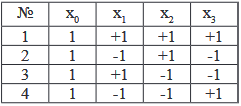

Условия смешивания эффектов задаются **обобщенным определяющим контрастом**, который получается из **генерирующего соотношения**.

**Генерирующее соотношение** – это соотношение, показывающее какое факторное взаимодействие заменено вводимым фактором.

**Обобщенный определяющий контраст** – это соотношение, получаемое от умножения **генерирующего соотношения** на выражение, стоящее в левой части **генерирующего соотношения**.


* **ГС**: 

$$х_4=х_1х_2х_3$$ 

Для определения определяющего контраста умножим обе части уравнения на $х_4$:

* **ООК:** 

$$х_4х_4 = х_1х_2х_3х_4$$ 


$$x_0 = 1 = х_1х_2х_3х_4$$



С помощью определяющего контраста находим, с каким эффектом смешан интересующий нас эффект. 
Для этого умножаем интересующий эффект на обе части определяющего контраста.

 

$$х_1: х_1 = х^2_1 х_2 х_3 х_4; х_1 = х_2 х_3 х_4$$, 


так как $х^2_i$ всегда равен 1.

И так далее, к примеру, для $х_1х_2$: 

$$х_1х_2 = х_3х_4$$

Одинаковые результаты оценок системы смешивания подчеркнуты. Из таблицы видна смешанность оценок влияния переменных $х_1х_2$ и $х_3х_4$ на функцию отклика, что не дает возможности осуществить раздельную оценку соответствующих коэффициентов регрессии ($b_5$ и $b_7$) при этих переменных.

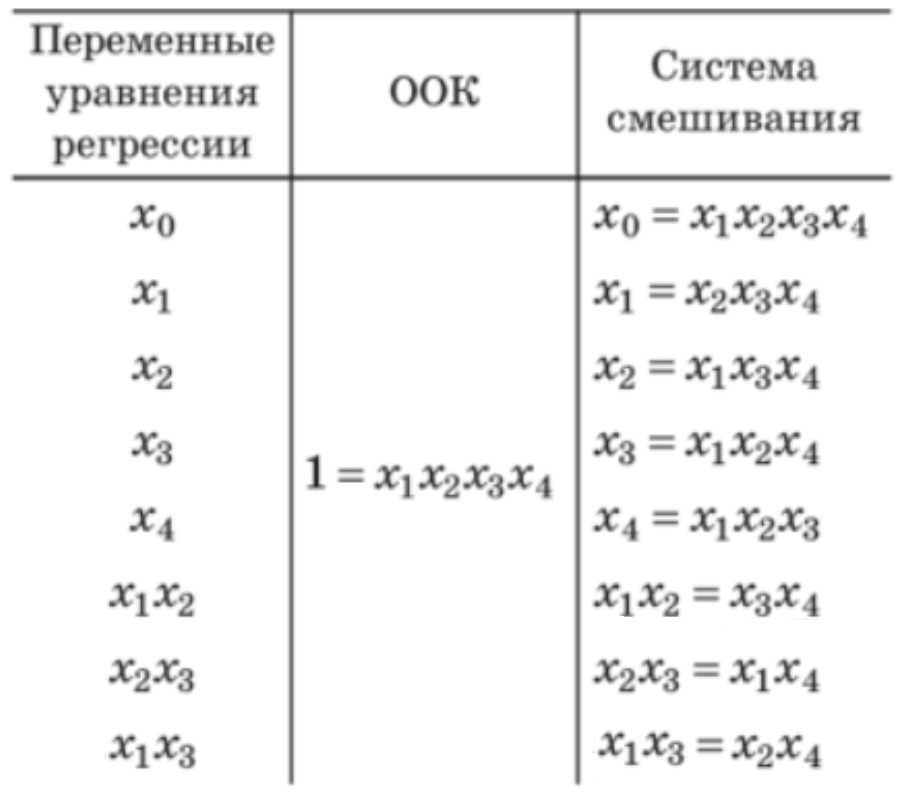

**Четверьтеплика**


Если в план эксперимента включить ещё один (пятый) фактор, то получим четверть-реплику - ДФЭ $2^{5-2}$.  


Вводим дополнительный фактор $х_5$ - **ГС**: $х_5 = х_1х_2$, (Т.е. комбинация $х_1х_2$ меняется на $х_5$)

тогда **ООК**: $1 = х_1х_2х_5$ 

С учетом того, что $1 = х_1х_2х_3х_4$

$$1 = х^2_1х^2_2х_3х_4х_5 = х_3х_4х_5$$.


и:

$$1= х_1х_2х_3х_4 = х_1х_2х_5=х_3х_4х_5$$



Дробные реплики могут быть **насыщенными**, либо **ненасыщенными**. 


* Если число опытов равно числу определяемых линейных эффектов, включая свободный член, то такой план называется **насыщенным** (вместо всех взаимодействий ввели новые факторы); 


* Если число опытов больше – то план **ненасыщенный** (например, ПФЭ); 


* Если число опытов меньше числа определяемых линейных эффектов, то план называется **сверхнасыщенным**.


Реплика, полученная при введении в план нового фактора за счёт
высшего взаимодействия, называется **главной полурепликой**.


С увеличением дробности реплики (1/4; 1/8; 1/16 и т.д.) разрешающая способность плана уменьшается, 
так как получаемые оценки коэффициентов уравнения регрессии смешиваются с эффектами других факторов и их взаимодействий. 


**Разрешающая способность реплики** – это число несмешанных линейных эффектов. 


Разрешающая способность реплики соответствует минимальному количеству факторов, записанных в определяющем контрасте. 

Если линейные эффекты смешаны с эффектами взаимодействий максимально высокого порядка, то такая реплика обладает максимальной разрешающей способностью и соответствует главной реплике. 

Реплики высокой дробности применяют как правило на первых этапах экспериментальных исследований. Такие планы служат для
отбора наиболее существенных факторов, либо для предварительной оптимизации условий путём отбора наиболее значимых вариантов, которые будут исследоваться далее более подробно.

Преимущества ДФЭ :

    1. Эффекты факторов, представляющих первостепенный интерес, могут быть изучены в более общих условиях;
    2. Уменьшается число опытов, необходимых для исследования заданного числа главных эффектов и эффектов парных взаимодействий.

Недостатки ДФЭ :

    1. Может остаться слишком мало степеней свободы для выявления разнообразных возможных случаев недостаточно высокого качества описания;
    2. Более высокая по сравнению с полным факторным экспериментом уязвимость к обычным ошибкам или погрешностям.


### Ссылки

* **Julia**

    - Ссылка: https://julialang.org/


* **Документация к основным пакетам Julia**

    - *Математика и анализ*

        * Roots.jl (нахождение корней) https://juliamath.github.io/Roots.jl/stable/

        * Optim.jl (Поиск минимума/максимума) https://julianlsolvers.github.io/Optim.jl/stable/#user/minimization/

        * ForwardDiff.jl (Дифференцирование) https://juliadiff.org/ForwardDiff.jl/stable/

        * QuadGK.jl (Численное интегрирование) https://juliamath.github.io/QuadGK.jl/stable/

        * DifferentialEquations.jl (Численное решение дифференциальных уравнений) https://diffeq.sciml.ai/stable/

    - *Статистика*

        * Distributions.jl (Основной пакет для работы с распределениями) https://juliastats.org/Distributions.jl/stable/

        * Statistics - Базовый пакет с основными статистическими функциями (не требует установки, но надо подключать `using Statistics`)

        * HypothesisTests.jl (основные статистические критерии) https://juliastats.org/HypothesisTests.jl/stable/

        * GLM.jl (Общая/обобщенная линейная модель) https://juliastats.org/GLM.jl/stable/
        
    - *Другое*

        * Plots.jl (Графики) https://docs.juliaplots.org



* **Литература**

    * Холодов В.И. Планирование экспериментов в гидробиологических исследованиях. – Симферопол
    
    * Адлер Ю. П., Маркова Е. В., Грановский Ю. В. Планирование эксперимента при поиске оптимальных условий. — М.: Наука, 1976. 
    
    * Сидняев, Н. И.  Теория планирования эксперимента и анализ статистических данных : учебник и практикум для вузов
    
    * Д. Финни, Введение в теорию планирования экспериментов

    *  Б.Ш. Гулиян, Р.Я. Хамидуллин., Математика. Базовый курс,Москва : Синергия, 2013. - 712 с. - ISBN 978-5-4257-0109-1. 

    * Фадеева Л. Н., Лебедев А. В., Теория вероятностей и математическая статистика: учебное пособие. - 2-е изд., перераб. и доп. - М.: Эксмо, 2010. - 496 с. 

    * [The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)

    * Линейная алгебра и ее применения - Стренг Г.

    * Матричный анализ - Хорн Р., Джонсон Ч.


* **Дополнительная литература:**

    * Математическая статистика в медицине, В. А. Медик, М. С. Токмачев, 978-5-279-03195-5

    * *Медико-биологическая статистика. Гланц. Пер. с англ. — М., Практика, 1998. — 459 с.*

    * *Байесовская статистика: Star Wars, LEGO, резиновые уточки и многое другое*

    * *Занимательная статистика. Манга.  Син Такахаси, 2009, 224с, ISBN: 978-5-97060-179-2*